In [57]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
% pylab inline 
df = pd.read_csv('year.csv')

Populating the interactive namespace from numpy and matplotlib


In [58]:
df.head(1)

,Unnamed: 0,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,...,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup
0,88777,2017,2,4,22,6,2017-04-22,AS,19930,AS,...,1300-1359,0,NaN,0,148,154.0,124.0,1,867,4


In [59]:
del df['Unnamed: 0']

In [60]:
del df['CancellationCode']

In [71]:
del df['Diverted']

In [61]:
# remove NaN values in df with several features
df.dropna(subset = ['TailNum', 'DepTime', 'DepTime', 'DepDelay', 'DepDelayMinutes', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrTime', 'ArrDelay', 'ArrDelayMinutes', 'ArrDel15', 'ArrivalDelayGroups', 'ActualElapsedTime', 'AirTime'], inplace = True)

In [62]:
df.isnull().sum()

Year                    0
Quarter                 0
Month                   0
DayofMonth              0
DayOfWeek               0
FlightDate              0
UniqueCarrier           0
AirlineID               0
Carrier                 0
TailNum                 0
FlightNum               0
OriginAirportID         0
OriginAirportSeqID      0
OriginCityMarketID      0
Origin                  0
OriginCityName          0
OriginState             0
OriginStateFips         0
OriginStateName         0
OriginWac               0
DestAirportID           0
DestAirportSeqID        0
DestCityMarketID        0
Dest                    0
DestCityName            0
DestState               0
DestStateFips           0
DestStateName           0
DestWac                 0
CRSDepTime              0
DepTime                 0
DepDelay                0
DepDelayMinutes         0
DepDel15                0
DepartureDelayGroups    0
DepTimeBlk              0
TaxiOut                 0
WheelsOff               0
WheelsOn    

In [63]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,...,ArrivalDelayGroups,ArrTimeBlk,Cancelled,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup
0,2017,2,4,22,6,2017-04-22,AS,19930,AS,N407AS,...,-1.0,1300-1359,0,0,148,154.0,124.0,1,867,4
1,2017,2,4,6,4,2017-04-06,AA,19805,AA,N4YDAA,...,-2.0,1100-1159,0,0,116,98.0,78.0,1,550,3
2,2017,2,4,9,7,2017-04-09,WN,19393,WN,N259WN,...,2.0,2100-2159,0,0,210,210.0,191.0,1,1300,6
3,2017,2,4,21,5,2017-04-21,WN,19393,WN,N8672F,...,-1.0,0001-0559,0,0,180,178.0,160.0,1,1276,6
4,2017,2,4,24,1,2017-04-24,OO,20304,OO,N506CA,...,-1.0,1300-1359,0,0,61,66.0,42.0,1,164,1


In [64]:
df.dtypes

Year                      int64
Quarter                   int64
Month                     int64
DayofMonth                int64
DayOfWeek                 int64
FlightDate               object
UniqueCarrier            object
AirlineID                 int64
Carrier                  object
TailNum                  object
FlightNum                 int64
OriginAirportID           int64
OriginAirportSeqID        int64
OriginCityMarketID        int64
Origin                   object
OriginCityName           object
OriginState              object
OriginStateFips           int64
OriginStateName          object
OriginWac                 int64
DestAirportID             int64
DestAirportSeqID          int64
DestCityMarketID          int64
Dest                     object
DestCityName             object
DestState                object
DestStateFips             int64
DestStateName            object
DestWac                   int64
CRSDepTime                int64
DepTime                 float64
DepDelay

In [65]:
# drop irrelevant object columns with unnecessary categorical variables such as origin state
#df1 = df.drop(df.select_dtypes(['number'])
df.drop(df.select_dtypes(['object']), inplace=True, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63779 entries, 0 to 64999
Data columns (total 41 columns):
Year                    63779 non-null int64
Quarter                 63779 non-null int64
Month                   63779 non-null int64
DayofMonth              63779 non-null int64
DayOfWeek               63779 non-null int64
AirlineID               63779 non-null int64
FlightNum               63779 non-null int64
OriginAirportID         63779 non-null int64
OriginAirportSeqID      63779 non-null int64
OriginCityMarketID      63779 non-null int64
OriginStateFips         63779 non-null int64
OriginWac               63779 non-null int64
DestAirportID           63779 non-null int64
DestAirportSeqID        63779 non-null int64
DestCityMarketID        63779 non-null int64
DestStateFips           63779 non-null int64
DestWac                 63779 non-null int64
CRSDepTime              63779 non-null int64
DepTime                 63779 non-null float64
DepDelay                63779 non-

In [67]:
# drop other nonnumerical columns such as IDs 
df = df.drop(columns = ['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'OriginStateFips','DestStateFips', 'DestAirportID', 'DestCityMarketID', 'DestAirportSeqID', 'OriginWac', 'DestWac'])

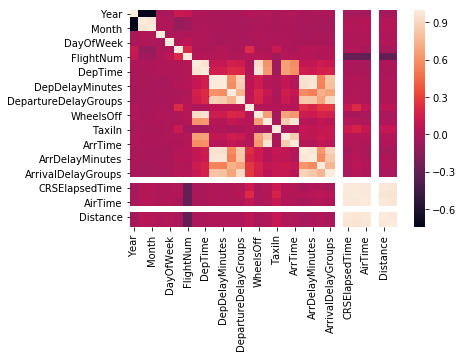

In [72]:
import seaborn as sns 
cor = df.corr()
sns.heatmap(cor)

In [77]:
from sklearn import linear_model
import statsmodels.api as sm
# ArrDel15 is target(y) as the arrival delay is defined as <15 = 1 
y = df['ArrDel15']
x = df.drop(columns = ['ArrDel15'])
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ArrDel15   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     6824.
Date:                Sat, 26 Jan 2019   Prob (F-statistic):               0.00
Time:                        02:40:01   Log-Likelihood:                 11934.
No. Observations:               63779   AIC:                        -2.382e+04
Df Residuals:                   63753   BIC:                        -2.358e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Year                    -0.0029      0.003     -1.113      0.266      -0.008       0.002
Quarter                 -0.0050      0.003     -1.652      0.099      -0.011       0.001
Month                    0.0006      0.001      0.663      0.507      -0.001       0.003
DayofMonth            8.916e-05   9.08e-05      0.982      0.326   -8.89e-05       0.000
DayOfWeek             6.147e-05      0.000      0.154      0.877      -0.001       0.001
AirlineID             1.014e-05   2.32e-06      4.371      0.000    5.59e-06    1.47e-05
FlightNum            -9.069e-07   4.83e-07     -1.878      0.060   -1.85e-06    3.96e-08
CRSDepTime            2.497e-05   6.15e-06      4.059      0.000    1.29e-05     3.7e-05
DepTime              -2.245e-05   8.28e-06     -2.713      0.007   -3.87e-05   -6.23e-06
DepDelay                 0.0037      0.000     18.353      0.000       0.003       0.004
DepDelayMinutes         -0.0144      0.000    -47.716      0.000      -0.015      -0.014
DepDel15                 0.5885      0.003    173.764      0.000       0.582       0.595
DepartureDelayGroups    -0.0521      0.002    -26.753      0.000      -0.056      -0.048
TaxiOut                 -0.0009   8.57e-05    -10.589      0.000      -0.001      -0.001
WheelsOff             7.295e-06   6.23e-06      1.172      0.241   -4.91e-06    1.95e-05
WheelsOn             -2.529e-05   6.07e-06     -4.167      0.000   -3.72e-05   -1.34e-05
TaxiIn                  -0.0007      0.000     -6.166      0.000      -0.001      -0.000
CRSArrTime            4.212e-06   3.21e-06      1.312      0.189   -2.08e-06    1.05e-05
ArrTime                2.38e-05   5.82e-06      4.087      0.000    1.24e-05    3.52e-05
ArrDelay                -0.0013   9.96e-05    -13.295      0.000      -0.002      -0.001
ArrDelayMinutes          0.0112      0.000     72.705      0.000       0.011       0.011
ArrivalDelayGroups       0.1205      0.002     64.265      0.000       0.117       0.124
Cancelled            -8.542e-17   7.33e-19   -116.530      0.000   -8.69e-17    -8.4e-17
CRSElapsedTime           0.0029      0.000     26.673      0.000       0.003       0.003
ActualElapsedTime       -0.0021    8.4e-05    -25.195      0.000      -0.002      -0.002
AirTime                 -0.0005   7.46e-05     -7.148      0.000      -0.001      -0.000
Flights                  5.8288      5.341      1.091      0.275      -4.640      16.298
Distance             -3.241e-05   1.15e-05     -2.820      0.005   -5.49e-05   -9.88e-06
DistanceGroup            0.0007      0.002      0.321      0.749      -0.004       0.005
==============================================================================
Omnibus:                     8903.268   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            65995.22

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [80]:
vif.round(1)

,VIF Factor,features
0,2.400000e+00,Year
1,1.700000e+01,Quarter
2,1.720000e+01,Month
3,1.000000e+00,DayofMonth
4,1.000000e+00,DayOfWeek
5,1.300000e+00,AirlineID
6,1.200000e+00,FlightNum
7,1.460000e+01,CRSDepTime
8,2.780000e+01,DepTime
9,inf,DepDelay


In [81]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import Imputer
class ReduceVIF(BaseEstimator, TransformerMixin):
    def __init__(self, thresh=5.0, impute=True, impute_strategy='median'):
        # From looking at documentation, values between 5 and 10 are "okay".
        # Above 10 is too high and so should be removed.
        self.thresh = thresh
        if impute:
            self.imputer = Imputer(strategy=impute_strategy)
    def fit(self, x, y=None):
        print('ReduceVIF fit')
        if hasattr(self, 'imputer'):
            self.imputer.fit(x)
        return self
    def transform(self, x, y=None):
        print('ReduceVIF transform')
        columns = x.columns.tolist()
        if hasattr(self, 'imputer'):
            x = pd.DataFrame(self.imputer.transform(x), columns=columns)
        return ReduceVIF.calculate_vif(x, self.thresh)
    @staticmethod
    def calculate_vif(x, thresh=5.0):
        dropped=True
        while dropped:
            variables = x.columns
            dropped = False
            vif = [variance_inflation_factor(x[variables].values, x.columns.get_loc(var)) for var in x.columns]
            
            max_vif = max(vif)
            if max_vif > thresh:
                maxloc = vif.index(max_vif)
                print(f'Dropping {x.columns[maxloc]} with vif={max_vif}')
                x = x.drop([x.columns.tolist()[maxloc]], axis=1)
                dropped=True
        return x
    def calculate_vif_2(x, thresh=5.0):        
        variables = range(x.shape[1])
        dropped=True
        while dropped:
            dropped=False
            vif = [variance_inflation_factor(x[variables].values, ix) for ix in range(x[variables].shape[1])]
            maxloc = vif.index(max(vif))
            if max(vif) > thresh:
                print('dropping \'' + x[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                del variables[maxloc]
                dropped=True
        print('Remaining variables:')
        print(x.columns[variables])
        return x[variables]

In [82]:
transformer = ReduceVIF()
transformer.fit_transform(x, y)

ReduceVIF fit
ReduceVIF transform


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


Dropping DepDelay with vif=inf
Dropping TaxiOut with vif=inf
Dropping Flights with vif=45162317.53396333


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1545: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


Dropping ActualElapsedTime with vif=4000.125838022287
Dropping AirlineID with vif=3076.466636950472
Dropping CRSElapsedTime with vif=478.8071018442029
Dropping Distance with vif=223.8288490000444
Dropping DepTime with vif=221.4212522558061
Dropping WheelsOn with vif=141.57194546310203
Dropping Quarter with vif=103.72322040798514
Dropping DistanceGroup with vif=76.25926746213317
Dropping WheelsOff with vif=70.00154149524266
Dropping DepDelayMinutes with vif=60.756969983676484
Dropping ArrDelay with vif=42.35392337687014
Dropping CRSArrTime with vif=38.76394515680359
Dropping Year with vif=28.59128535925852
Dropping CRSDepTime with vif=11.98576753475748
Dropping DepartureDelayGroups with vif=9.03447427983743
Dropping ArrTime with vif=6.289104513273073


,Month,DayofMonth,DayOfWeek,FlightNum,DepDel15,TaxiIn,ArrDelayMinutes,ArrivalDelayGroups,Cancelled,AirTime
0,4.0,22.0,6.0,634.0,0.0,9.0,0.0,-1.0,0.0,124.0
1,4.0,6.0,4.0,323.0,0.0,12.0,0.0,-2.0,0.0,78.0
2,4.0,9.0,7.0,5923.0,1.0,11.0,38.0,2.0,0.0,191.0
3,4.0,21.0,5.0,1645.0,0.0,6.0,0.0,-1.0,0.0,160.0
4,4.0,24.0,1.0,4285.0,0.0,10.0,0.0,-1.0,0.0,42.0
5,4.0,23.0,7.0,4238.0,0.0,10.0,0.0,-1.0,0.0,85.0
6,4.0,6.0,4.0,631.0,0.0,6.0,0.0,-2.0,0.0,311.0
7,4.0,7.0,5.0,1078.0,0.0,10.0,0.0,-2.0,0.0,50.0
8,4.0,12.0,3.0,18.0,0.0,9.0,0.0,-2.0,0.0,34.0
9,4.0,28.0,5.0,1897.0,1.0,18.0,11.0,0.0,0.0,206.0


In [84]:
new_df = df[['Month', 'DayofMonth', 'DayOfWeek', 'AirlineID', 'FlightNum', 'DepDel15', 'TaxiIn', 'AirTime', 'ArrDel15']]

In [85]:
new_df.to_csv('features.csv')